In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sb

In [3]:
start_year_1 = 1950
start_year = 1960


# File to Load (Remember to change these)
OWID_life_expectancy_csv_path = "data_sources/OWID_life-expectancy.csv"

# Read in the data from the CSV
OWID_life_expectancy_data = pd.read_csv(OWID_life_expectancy_csv_path)

# convert data to a DataFrame
OWID_life_expectancy_df_raw = pd.DataFrame(OWID_life_expectancy_data)
OWID_life_expectancy_df = OWID_life_expectancy_df_raw.rename(columns={"Life expectancy (Clio-Infra up to 1949; UN Population Division for 1950 to 2015) (years)":"life_expectancy",
                                                                     "Entity":"entity",
                                                                     "Code":"code",
                                                                     "Year":"year"})
OWID_life_expectancy_df.head()


,entity,code,year,life_expectancy
0,Afghanistan,AFG,1950,27.537001
1,Afghanistan,AFG,1951,27.809999
2,Afghanistan,AFG,1952,28.350000
3,Afghanistan,AFG,1953,28.879999
4,Afghanistan,AFG,1954,29.399000


In [4]:
other_category_life_expectancy = OWID_life_expectancy_df.loc[OWID_life_expectancy_df["code"].isnull(),:]
#other_category_life_expectancy["entity"].value_counts()
other_category_life_expectancy.head()

,entity,code,year,life_expectancy
66,Africa,NaN,1950,36.449001
67,Africa,NaN,1951,36.705002
68,Africa,NaN,1952,37.215000
69,Africa,NaN,1953,37.723000
70,Africa,NaN,1954,38.228001


In [5]:
x_axis = other_category_life_expectancy["year"].unique()
x_axis

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

<IPython.core.display.Javascript object>


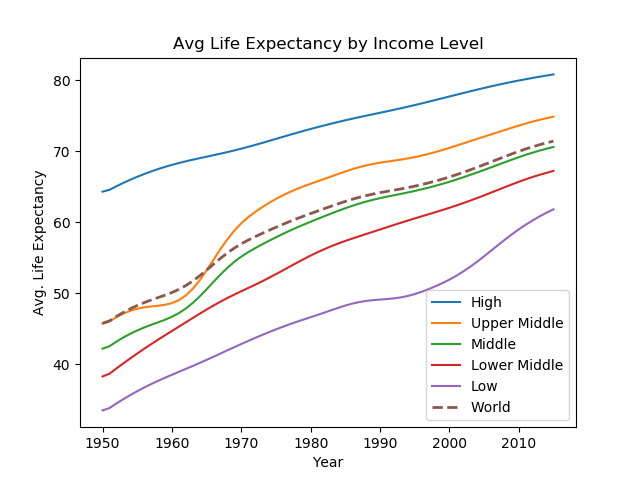

In [6]:
# create initial plot
#fig, ax = plt.subplots()
high_income_life_ex = other_category_life_expectancy.loc[other_category_life_expectancy["entity"] == "High-income countries",:]
upper_middle_income_life_ex = other_category_life_expectancy.loc[other_category_life_expectancy["entity"] == "Upper-middle-income countries",:]
middle_income_life_ex = other_category_life_expectancy.loc[other_category_life_expectancy["entity"] == "Middle-income countries",:]
lower_middle_income_life_ex = other_category_life_expectancy.loc[other_category_life_expectancy["entity"] == "Lower-middle-income countries",:]
low_income_life_ex = other_category_life_expectancy.loc[other_category_life_expectancy["entity"] == "Low-income countries",:]
world_life_expectancy = OWID_life_expectancy_df.loc[OWID_life_expectancy_df["entity"] == "World",:]

#print(low_income_life_ex)

# Create a handle for each plot
# 
a_handle = plt.plot(high_income_life_ex["year"], high_income_life_ex["life_expectancy"], label="High")
b_handle = plt.plot(upper_middle_income_life_ex["year"], upper_middle_income_life_ex["life_expectancy"], label="Upper Middle")
c_handle = plt.plot(middle_income_life_ex["year"], middle_income_life_ex["life_expectancy"], label="Middle")
d_handle = plt.plot(lower_middle_income_life_ex["year"], lower_middle_income_life_ex["life_expectancy"], label="Lower Middle")
e_handle = plt.plot(low_income_life_ex["year"], low_income_life_ex["life_expectancy"], label="Low")
f_handle = plt.plot(world_life_expectancy["year"], world_life_expectancy["life_expectancy"], label="World", linestyle='dashed', linewidth=2)

plt.title("Avg Life Expectancy by Income Level")
plt.xlabel("Year")
plt.ylabel("Avg. Life Expectancy")

plt.legend(loc="best")




In [8]:
country_life_expectancy = OWID_life_expectancy_df.loc[(OWID_life_expectancy_df["code"].isnull() != True)
                                                      & (OWID_life_expectancy_df["year"] >= start_year_1)
                                                      & (OWID_life_expectancy_df["entity"] != "World")
                                                      ,:]

country_life_expectancy["entity"].value_counts()
country_life_expectancy["entity"].unique()
len(country_life_expectancy["entity"].unique())

202

<IPython.core.display.Javascript object>


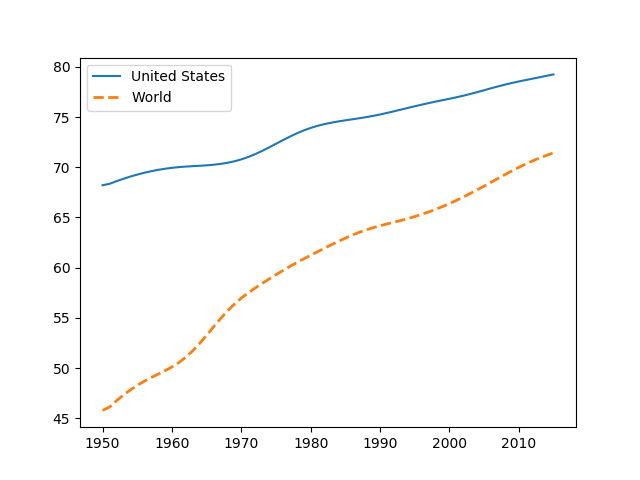

,entity,code,year,life_expectancy
16889,United States,USA,2011,78.681999
16890,United States,USA,2012,78.820999
16891,United States,USA,2013,78.959999
16892,United States,USA,2014,79.099998
16893,United States,USA,2015,79.244003


In [9]:
fig1, ax1 = plt.subplots()

single_country = "United States"
single_life_expectancy = country_life_expectancy.loc[country_life_expectancy["entity"] == single_country,:]
ax1.plot(single_life_expectancy["year"], single_life_expectancy["life_expectancy"], label=single_country)
ax1.plot(world_life_expectancy["year"], world_life_expectancy["life_expectancy"], label="World", linestyle='dashed', linewidth=2)

plt.legend(loc="best")

single_life_expectancy.tail()

In [11]:
# countries_subset = country_life_expectancy.loc[(country_life_expectancy["year"] == 2015)
#                                                          & (country_life_expectancy["life_expectancy"] >=81)
#                                                          #& (country_life_expectancy["Life expectancy"] >= 29)
#                                                          ,:]["entity"].unique()


# countries_subset = country_life_expectancy.loc[(country_life_expectancy["year"] == 1950)
#                                                          & (country_life_expectancy["life_expectancy"] >=68)
#                                                          #& (country_life_expectancy["Life expectancy"] >= 29)
#                                                          ,:]["entity"].unique()


# unique_countries = country_life_expectancy["Entity"].unique()
# countries_subset = country_life_expectancy.loc[(country_life_expectancy["Year"] == 1950)
#                                                          & (country_life_expectancy["Life expectancy"] <= 35)
#                                                          ,:].unique()


countries_subset = ['Japan',
            'South Korea', # Korea, Dem. People’s Rep.
            'United Kingdom',
            'Singapore',
            'Russia', # Russian Federation
            'Finland',
            'Canada',
            'Netherlands',
            'Ireland',
            'Israel',
            'China',
            'New Zealand',
            'Norway',
            'Belgium',
            'Germany',
            'Denmark',
            'Estonia',
            'United States',
            'France',
            'Portugal']

<IPython.core.display.Javascript object>


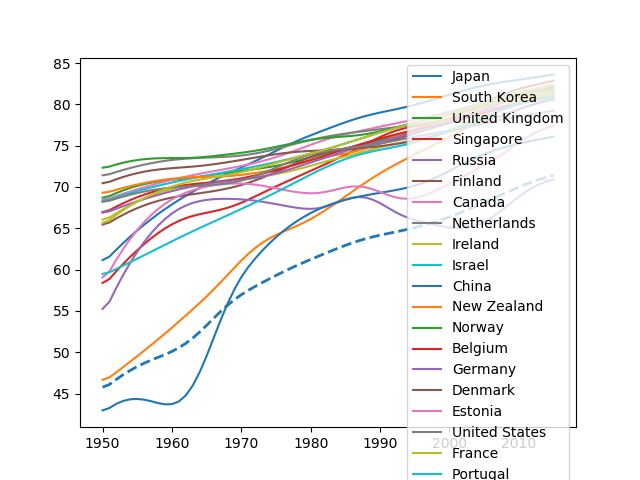

In [12]:
#unique_countries = country_life_expectancy["Entity"].unique()
# countries_under_35_in_1950 = country_life_expectancy.loc[(country_life_expectancy["Year"] == 1950)
#                                                          & (country_life_expectancy["Life expectancy"] <= 35)
#                                                          ,:].unique()

fig1, ax1 = plt.subplots()

for country in countries_subset:
    year = country_life_expectancy.loc[country_life_expectancy["entity"] == country,["year"]]
    life_expectancy = country_life_expectancy.loc[country_life_expectancy["entity"] == country,["life_expectancy"]]
    ax1.plot(year, life_expectancy, label=country)

ax1.plot(world_life_expectancy["year"], world_life_expectancy["life_expectancy"], label="World", linestyle='dashed', linewidth=2)
ax1.legend(loc="best")

fig1.show()

# Find our 20 specific countries in dataset and export them starting with year

<IPython.core.display.Javascript object>


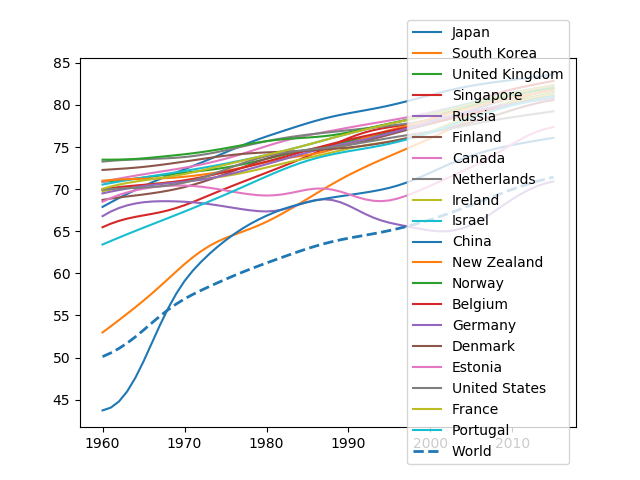

In [13]:
country_subset_life_expectancy = OWID_life_expectancy_df.loc[(OWID_life_expectancy_df["entity"].isin(countries_subset))
                                                              & (OWID_life_expectancy_df["year"] >= start_year)
                                                              ,:]

world_subset_life_expectancy = OWID_life_expectancy_df.loc[(OWID_life_expectancy_df["entity"] == "World")
                                                              & (OWID_life_expectancy_df["year"] >= start_year)
                                                              ,:]

#print(country_subset_life_expectancy["Entity"].unique())

fig2, ax2 = plt.subplots()

for country in countries_subset:
    year = country_subset_life_expectancy.loc[country_subset_life_expectancy["entity"] == country,["year"]]
    life_expectancy = country_subset_life_expectancy.loc[country_subset_life_expectancy["entity"] == country,["life_expectancy"]]
    ax2.plot(year, life_expectancy, label=country)

ax2.plot(world_subset_life_expectancy["year"], world_subset_life_expectancy["life_expectancy"], label="World", linestyle='dashed', linewidth=2)

ax2.legend(loc="right")

fig2.show()



In [22]:
# Save path to store output file set in a variable
csv_output = "data_exports/CLEAN_LifeExpectancy_20Countries.csv"

# Export file as a CSV, without the Pandas index, 
# but with the header
country_subset_life_expectancy.to_csv(csv_output, index=False, header=True)
